# Stack Overflow Dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
%matplotlib inline
import time
from matplotlib.pyplot import GridSpec
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from os import getcwd, chdir, listdir


chdir('/Users/JMHong/Documents/Python/Udacity/Machine Learning/P5')

In [4]:
filename = '/Dataset/2016 Stack Overflow Survey Responses.csv'

In [5]:
# Let's preview dataset
df = pd.read_csv(getcwd() + filename)

def reset_df():
    """This function reverts the dataset into the original"""
    global df
    df = pd.read_csv(getcwd() + filename)
    

def check_class(objct):
    return objct.__class__.__name__

    
df.head()

,Unnamed: 0,collector,country,un_subregion,so_region,age_range,age_midpoint,gender,self_identification,occupation,...,important_sameend,important_newtech,important_buildnew,important_buildexisting,important_promotion,important_companymission,important_wfh,important_ownoffice,developer_challenges,why_stack_overflow
0,1888,Facebook,Afghanistan,Southern Asia,Central Asia,20-24,22.0,Male,Programmer,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4637,Facebook,Afghanistan,Southern Asia,Central Asia,30-34,32.0,Male,Developer; Engineer; Programmer,Mobile developer - iOS,...,This is somewhat important,This is very important,This is very important,I don't care about this,This is somewhat important,This is somewhat important,I don't care about this,I don't care about this,Unrealistic expectations; Interacting with non...,To get help for my job; Because I can't do my ...
2,11164,Facebook,Afghanistan,Southern Asia,Central Asia,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21378,Facebook,Afghanistan,Southern Asia,Central Asia,NaN,NaN,Female,Engineer,DevOps,...,I don't care about this,This is somewhat important,This is very important,This is very important,I don't care about this,I don't care about this,This is very important,This is somewhat important,Corporate policies; Interacting with non-techn...,To get help for my job; Beacause I love to learn
4,30280,Facebook,Afghanistan,Southern Asia,Central Asia,> 60,65.0,Prefer not to disclose,Developer; Engineer; Programmer; Sr. Developer...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# I'd like to observe an arbitrary column and analyze the categories within
c = 'industry'
df[c].groupby(df[c]).count()

industry
Aerospace                   396
Automotive                  804
Consulting                 2786
Consumer Products          1329
Defense                     421
Education                  1538
Finance / Banking          3391
Foundation / Non-Profit     415
Gaming                      965
Government                 1245
Healthcare                 1755
I'm a student               326
Internet                   2703
Manufacturing              1088
Media / Advertising        1986
Not Currently Employed      187
Other (please specify)     3802
Retail                     1023
Software Products          8916
Telecommunications         1407
Web Services               3627
dtype: int64

# Understanding the columns and extracting the target columns for predictions

## There are a few things I'd like to do for a general plan:

1 Look at and understand the data

2 Break the dataset into a few mini projects, first starting with one mini project. 

3 Take a few columns as features, and use them for as the target column for each prediction

4 Mine and separate useful data into features to make different predictions:

    prediction 1 will use feature columns A - E
    
    prediction 2 will use feature columns F - P
    
    prediction 3 will use feature columns Q - X
    
4 Find patterns in the data, then trim the dataset as needed to find more patterns in the data

5 Make predictions, such as predict if a person is looking for a new job, and contact them.


example columns to use for the first prediction: 
'open_to_new_job', 'open_to_new_job', 'new_job_value', 'agree_loveboss', 'important_variety', 'important_newtech'

I'd like to understand more about the people who are currently working. Can we determine groups of people and their personalities, based on the importance of the workplace questions? From there, can we determine if those different types of people are looking for a new job? Can an ideal company be created to optimize worker happiness (of course, there are tradeoffs)?

By looking at the columns, I'll cherrypick features that I think are important and list the reasons alongside them.
'age_range'           - does age determine if the person is looking for a                         new job?
'experience_range'    - does their level of experience encourage them to                           hop around to different companies?
'programming_ability' - this is not just a measure of their perceived                             ability but also a measure of their confidence 
'agree_loveboss'      - can they tolerate their bosses easily
'important_variety'   - would they rather switch roles often or do they                           prefer to stay with a specialty
'important_control'   - i hypothesize that this relates to b
'important_promotion' - do they care about promotions? i know some would                           rather be coding
'important_newtech'   - 
'important_companymission' - do they care about this much?
'important_buildexisting' - i think this would be the opposite of working                             with a variety of projects
'important_buildnew'  - build new?
'important_wfh'       - would this really matter?
'developer_challenges'- are there certain things that developers could do                         without?
'new_job_value'       - important about new employment opportunity, this                           is important to know
'tech_want'           - 
'education'           - 
'industry'            - 
'agree_notice'        - this shows how some brains work
'agree_nightcode'     - because these guys are a different type of animal
'occupation'          - 

I'm going to combine these to create a new dataframe then use the .dropna() function to remove unnecessary data to see if the data isn't reduced down too much.

From there, we will use PCA for feature extraction in order to focus on the really important ones

Process:
• Combine data into one DataFrame
• drop entries and columns with too many NaN values
• features: expand certain features
• label: vectorize the entries

In [7]:
# Combine all columns into one dataframe
work_xp = ['age_range', 'experience_range', 'programming_ability', 'agree_loveboss',
           'important_variety', 'important_control', 'important_promotion',
           'important_newtech', 'important_companymission', 'important_buildexisting',
           'important_buildnew', 'important_wfh', 'developer_challenges',
           'new_job_value', 'education', 'occupation', 'open_to_new_job']

# create a dataframe template
work_xp_df = pd.DataFrame(index=df.index)

# combine the selected columns into the new dataframe
for col in work_xp:
    work_xp_df = pd.concat([work_xp_df, df[col]], axis=1)
    

original = work_xp_df.shape # shape before dropping NaN entries
# remove the NaN entries
work_xp_df = work_xp_df.dropna()
reduced = work_xp_df.shape # shape after dropping NaN entries

# equation to calculate the percent change
percent_change = float((original[0] - reduced[0])) / float(original[0]) * 100
print "Using the .dropna() function reduces the data by {:.2f}% to these dimensions".format(percent_change, reduced)

# I'd like to come back to this, and see if the ML algos can use this dataset with NaN values

Using the .dropna() function reduces the data by 35.40% to these dimensions


In [8]:
work_xp_df

,age_range,experience_range,programming_ability,agree_loveboss,important_variety,important_control,important_promotion,important_newtech,important_companymission,important_buildexisting,important_buildnew,important_wfh,developer_challenges,new_job_value,education,occupation,open_to_new_job
1,30-34,6 - 10 years,7.0,Agree somewhat,This is very important,This is very important,This is somewhat important,This is very important,This is somewhat important,I don't care about this,This is very important,I don't care about this,Unrealistic expectations; Interacting with non...,Salary; Ability to make or influence important...,I'm self-taught; On-the-job training; B.S. in ...,Mobile developer - iOS,I am not interested in new job opportunities
7,25-29,1 - 2 years,7.0,Agree completely,This is very important,This is very important,This is very important,This is very important,This is very important,This is very important,This is very important,I don't care about this,Non-technical management; Poor infrastructure ...,Salary; Company size; Job title,B.S. in Computer Science (or related field),Back-end web developer,"I'm not actively looking, but I am open to new..."
9,20-24,1 - 2 years,3.0,Neutral,This is very important,This is somewhat important,This is very important,This is very important,This is somewhat important,This is somewhat important,This is very important,This is somewhat important,Poor documentation,Tech stack; Opportunity for advancement,I'm self-taught; On-the-job training; Online c...,Back-end web developer,"I'm not actively looking, but I am open to new..."
11,20-24,6 - 10 years,9.0,Agree completely,This is somewhat important,This is very important,This is very important,This is very important,This is very important,This is somewhat important,This is very important,This is somewhat important,Poor team dynamics; Inefficient development pr...,Salary; Company stage; Work/life balance; Oppo...,"I'm self-taught; Online class (e.g. Coursera, ...",Full-stack web developer,"I'm not actively looking, but I am open to new..."
12,25-29,6 - 10 years,7.0,Neutral,This is somewhat important,This is very important,This is very important,This is very important,This is very important,This is somewhat important,This is very important,This is somewhat important,Poor scheduling; Interacting with stupid peopl...,Salary; Opportunity for advancement; Job title,B.S. in Computer Science (or related field),Full-stack web developer,I am actively looking for a new job
13,25-29,6 - 10 years,8.0,Disagree somewhat,This is somewhat important,This is somewhat important,This is somewhat important,This is very important,This is somewhat important,This is somewhat important,This is very important,This is somewhat important,Poor team dynamics; Inefficient development pr...,Salary; Company size; Company financials; Work...,I'm self-taught; On-the-job training; Masters ...,Back-end web developer,I am actively looking for a new job
14,20-24,1 - 2 years,7.0,Agree completely,I don't care about this,This is very important,This is very important,This is very important,This is very important,This is very important,This is very important,This is very important,Trying to be nice,Salary; Equity; Ability to make or influence i...,I'm self-taught; On-the-job training,Back-end web developer,I am not interested in new job opportunities
19,25-29,6 - 10 years,9.0,Neutral,This is somewhat important,This is somewhat important,This is very important,This is somewhat important,This is very important,This is very important,This is very important,This is somewhat important,Poor team dynamics; Interacting with stupid pe...,Salary; Remote working option; Flexible work h...,Masters Degree in Computer Science (or related...,Desktop developer,"I'm not actively looking, but I am open to new..."
20,20-24,2 - 5 years,6.0,Agree completely,This is very important,This is very important,This is somewhat important,This is very important,This is very important,This is very important,This is very im

# Next, split columns into features and label columns

In [9]:
# dataset of the features
feature_cols = work_xp_df.columns[:min(*work_xp_df.shape) - 1]
# dataset of the label column
label_col = work_xp_df.columns[-1]

print work_xp_df[label_col].groupby(work_xp_df[label_col]).count()

print feature_cols

open_to_new_job
I am actively looking for a new job                              5538
I am not interested in new job opportunities                     7439
I'm not actively looking, but I am open to new opportunities    23220
dtype: int64
Index([u'age_range', u'experience_range', u'programming_ability',
       u'agree_loveboss', u'important_variety', u'important_control',
       u'important_promotion', u'important_newtech',
       u'important_companymission', u'important_buildexisting',
       u'important_buildnew', u'important_wfh', u'developer_challenges',
       u'new_job_value', u'education', u'occupation'],
      dtype='object')


# The columns need to be vectorized and normalized, since they are currently formatted into categories, objects, and strings

The label column has three entries: [“I am not interested in new job opportunities”, “I’m not actively looking, but I am open to new opportunities”, “I am actively looking for a new job”]. I'd have to convert "I am not interested in new job opportunities" to have a value of 0 and the other two entries to a value of 1.

The feature columns are more complicated, since each are formatted differently. The features need to be categorized into different groups, based on how they need to be vectorized. Then we need to call a function on each of those groups to get the DataFrame's final desired format.

One challenge I'm thinking of is that the vectorized columns are unable to be inverse-transformed, meaning once ['red', 'white', 'blue'] is turned into [0, 1, 2], will we need to label the vectors ['red', 'white', 'blue'] for identifying the entries in the column.

In [32]:
# vectorize label column

mapper = {"I am not interested in new job opportunities": 0,
          "I'm not actively looking, but I am open to new opportunities": 1,
          "I am actively looking for a new job": 1}

label = pd.DataFrame(work_xp_df[label_col].map(mapper))

print label

       open_to_new_job
1                    0
7                    1
9                    1
11                   1
12                   1
13                   1
14                   0
19                   1
20                   1
21                   0
22                   0
23                   1
24                   1
26                   1
31                   1
32                   1
33                   1
34                   1
36                   1
37                   1
39                   1
40                   1
41                   1
42                   1
44                   1
45                   0
46                   1
48                   1
49                   1
51                   1
...                ...
55980                1
55981                1
55983                1
55984                1
55985                1
55986                1
55987                0
55988                1
55990                1
55991                0
55993                1
55994      

In [11]:
# before vectorizing the feature columns, we'll take a look at how all of them are formatted
features = work_xp_df[feature_cols]

print features[features.columns[0:5]]

      age_range  experience_range  programming_ability       agree_loveboss  \
1         30-34      6 - 10 years                  7.0       Agree somewhat   
7         25-29       1 - 2 years                  7.0     Agree completely   
9         20-24       1 - 2 years                  3.0              Neutral   
11        20-24      6 - 10 years                  9.0     Agree completely   
12        25-29      6 - 10 years                  7.0              Neutral   
13        25-29      6 - 10 years                  8.0    Disagree somewhat   
14        20-24       1 - 2 years                  7.0     Agree completely   
19        25-29      6 - 10 years                  9.0              Neutral   
20        20-24       2 - 5 years                  6.0     Agree completely   
21        20-24       2 - 5 years                  9.0     Agree completely   
22         < 20  Less than 1 year                  4.0  Disagree completely   
23        20-24       2 - 5 years                  7

In [14]:
from sklearn.feature_extraction import DictVectorizer
# FeatureHasher is an alternative to DictVectorizer for memory tight data
from sklearn.feature_extraction import FeatureHasher

age_range: the age_range needs to be vectorize

experience_range: vectorize

programming_ability: vectorize

agree_loveboss: vectorize

important_variety: vectorize

important_contro: vectorize

important_companymission: vectorize

important_buildexisting: vectorize

important_buildnew: vectorize

important_wfh: vectorize

developer_challenges: convert to bernoulli columns

new_job_value: convert to bernoulli columns

education: convert to bernoulli columns

occupation: vectorize

## the columns that need to be vectorized are converting the entries to numbers range(0, n)
## the columns that need to be converted to bernoulli columns have multiple answers

We'll create two functions for these two groups

In [31]:
# this function uses the LabelEncoder() to convert entries into numeric values

def vectorize_data(df, col):
    # BUG: it reorders the row indices into [1, 2, 3, 4, 5, ...] instead of keeping the indices[1, 7, 9, 11, 12, 13, ...]
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    le.fit(df[col])
    vectorized = le.transform(df[col])
    
    return pd.DataFrame(vectorized, columns=[col])


# i'm going to create another function, similar to vectorize_data(), that removes the bug
def vectorize_data2(df, col):
    # first create the mapper
    mapper = {}
    counter = 0
    for idx, entry in df[col].iteritems():
        if entry not in mapper and not pd.isnull(entry):
            mapper[entry] = counter
            counter += 1
            
    return pd.DataFrame(df[col].map(mapper))


# this function splits the multiple answers into all columns and inputs binary entries
def convert_to_bernoulli_columns(df, column_name):
    # BUG BUG BUG
    # doesn't include an NaN columns and rows; must drop NaN first
    a = df[column_name].str.get_dummies(sep='; ')
    return a


# this main function takes in the entire dataset and converts the columns, using the converters above
def main_transform_columns(df):
    outX = pd.DataFrame(index=df.index)
    
    bernoulli = ["developer_challenges", "new_job_value", "education"]
    for col in df.columns:
        if col in bernoulli:
            expanded_col = convert_to_bernoulli_columns(df, col)
            outX = outX.join(expanded_col)
        else:
            col = vectorize_data2(df, col)
            outX = outX.join(col)
            
    return outX


# BUG: NaN entries
cleaned_features = main_transform_columns(features)
print cleaned_features.head(10)
# BUG: for some reason the data's shape is 36197 rows, but the dataframe is printing out 56000 rows
# BUG hypothesis: the NaN entries are saved onto the dataframe but aren't visible. when i call the transform function, they reappear
# FIXED

# BUG solution: each of the functions are producing columns with different indices
# to solve this i need to vectorize all the data and turn the NaN entries into 0, for all of the columns
# from there, use the fillna() function to reduce the dataset 
# FIXED

   age_range  experience_range  programming_ability  agree_loveboss  \
0          0                 0                    0               0   
1          1                 1                    0               1   
2          2                 1                    1               2   
3          2                 0                    2               1   
4          1                 0                    0               2   
5          1                 0                    3               3   
6          2                 1                    0               1   
7          1                 0                    2               2   
8          2                 2                    4               1   
9          2                 2                    2               1   

   important_variety  important_control  important_promotion  \
0                  0                  0                    0   
1                  0                  0                    1   
2                  0      

In [16]:
# It looks like this is a more appropriate algorithm to not change the indices
vectorize_data2(features, features.columns[0])

,age_range
1,0
7,1
9,2
11,2
12,1
13,1
14,2
19,1
20,2
21,2


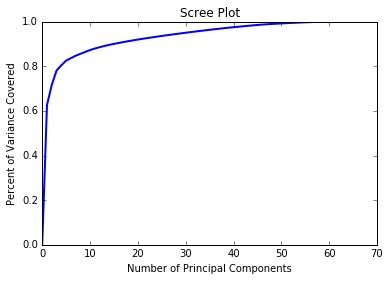

None
[ 0.62613962  0.71622713  0.78082565  0.80423106  0.82507155  0.83644981
  0.8469577   0.85570547  0.86422223  0.87252709  0.87936171  0.88536899
  0.89070809  0.8957739   0.90014431  0.90440833  0.90844857  0.91229779
  0.91596652  0.91954682  0.92300008  0.92625232  0.92945287  0.93260746
  0.93573389  0.93873301  0.94162008  0.94448404  0.94727891  0.95004355
  0.95276872  0.9554671   0.95811172  0.96069402  0.96326663  0.96570048
  0.96810615  0.97047171  0.97274443  0.97488854  0.97699855  0.97905141
  0.98105267  0.98303758  0.98495271  0.98657283  0.98807019  0.98941587
  0.99064217  0.99183339  0.99294245  0.99400352  0.99502363  0.99592123
  0.99676975  0.9976044   0.99838053  0.99896154  0.999509    0.99981711
  1.        ]


In [17]:
# use PCA to reduce the data into lower dimensions
from sklearn.decomposition import PCA


def feature_components_evr(feature_columns):
    pca = PCA(n_components=min(*feature_columns.shape))
    pca.fit(feature_columns)
    
    return pca.components_, pca.explained_variance_ratio_
    
    
def scree_plot(evr):
    """Used to determine the number of components to use for PCA"""
    evr = np.concatenate([[0], evr])
    cum_evr = np.cumsum(evr)
    
    pl.figure()
    pl.title("Scree Plot")
    pl.plot(cum_evr, lw=2, label="Cumulative Explained Variance Ratio")
    pl.xlabel("Number of Principal Components")
    pl.ylabel("Percent of Variance Covered")
    pl.show()

fce = feature_components_evr(cleaned_features)

print scree_plot(fce[1])
print np.cumsum(fce[1])

## Based on the scree plot, above, I decided to use 3 principal components
To hypertune and modify the data later, I'll try it with 4 principal components

## Now, I'll scale and reduce the data. The data will only have the feature columns, leaving out the label column.
Before scaling, we need to take a look at the distribution of data for each column

In [18]:
def plot_column((x, y, column_name)):
    # plot a bar graph
    idx = np.arange(len(y))

    pl.figure(figsize=(10,8))
    pl.title("{}".format(column_name.upper()))
    pl.bar(np.arange(len(x)),
           y.values,
           color='r',
           tick_label=list(x))
    pl.xticks(np.arange(len(x)), list(x), rotation='vertical')
    pl.subplots_adjust(bottom=0.15)
    pl.show()


print cleaned_features[cleaned_features.columns[0]]
    
for col, data in cleaned_features.iteritems():
    m = np.mean(data)
    sd = np.std(data)
#     print data.groupby(data).count().index
    # bug, the index names aren't aligned with the data
#     print data.groupby(data).count()
#     print plot_column(())

1        0
7        1
9        2
11       2
12       1
13       1
14       2
19       1
20       2
21       2
22       3
23       2
24       2
26       4
31       2
32       1
33       1
34       2
36       2
37       0
39       1
40       2
41       1
42       1
44       2
45       0
46       2
48       1
49       5
51       3
        ..
55980    1
55981    0
55983    1
55984    5
55985    0
55986    5
55987    0
55988    0
55990    0
55991    0
55993    0
55994    4
55996    2
55997    7
55998    5
55999    0
56000    1
56001    0
56002    5
56003    5
56004    4
56005    4
56006    2
56007    2
56009    1
56012    0
56014    0
56019    5
56022    1
56029    2
Name: age_range, dtype: int64


In [19]:
from sklearn.preprocessing import StandardScaler

first_pc = feature_components_evr(cleaned_features)[0][0]
second_pc = feature_components_evr(cleaned_features)[0][1] 
third_pc = feature_components_evr(cleaned_features)[0][2]

original_data = cleaned_features
# scale to a distribution with mean = 0 and sd = 1
# bad with data that isn't normally distributed, can be a problem with categorized data that turned into vectors
# might have to change the scaling method later
scaled_data = StandardScaler().fit_transform(cleaned_features)
# reduce data, using 4 principal components
reduced_data = PCA(n_components=3).fit_transform(cleaned_features)
# reduced and scaled
reduced_scaled_data = StandardScaler().fit_transform(reduced_data)

print "Original data: {} rows, {} columns".format(*original_data.shape)
print "Scaled data: {} rows, {} columns".format(*scaled_data.shape)
print "Reduced data: {} rows, {} columns".format(*reduced_data.shape)
print "Reduced and scaled data: {} rows, {} columns".format(*reduced_scaled_data.shape)
print "First PC: {}".format(first_pc[:5])
print "Second PC: {}".format(second_pc[:5])
print "Third PC: {}".format(third_pc[:5])

Original data: 36197 rows, 61 columns
Scaled data: 36197 rows, 61 columns
Reduced data: 36197 rows, 3 columns
Reduced and scaled data: 36197 rows, 3 columns
First PC: [ 0.01119528  0.00947554  0.01515544 -0.00049852 -0.00156531]
Second PC: [  2.86470445e-01   2.01487018e-01   9.35439029e-01   1.95002744e-02
   4.77947483e-04]
Third PC: [ 0.80118869  0.47966864 -0.3512693   0.01681907  0.0048617 ]


## Now, I'd like to visualize the reduced data and observe the principal components

ValueError: setting an array element with a sequence.

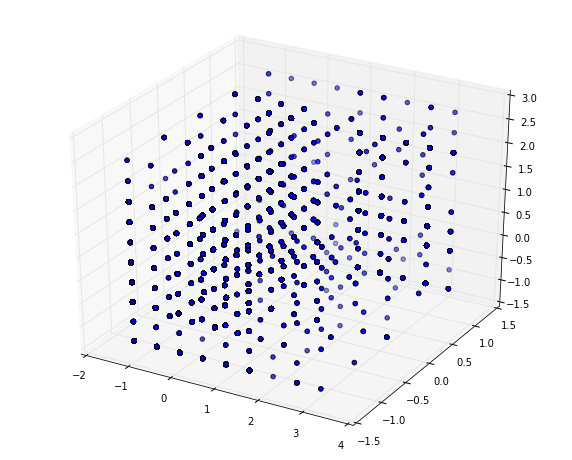

In [61]:
from mpl_toolkits.mplot3d import Axes3D


def plot_pc_data(features):
    x = features[features.columns[0]]
    y = features[features.columns[1]]
    z = features[features.columns[2]]
    fig = pl.figure(figsize=(10, 8))
    pl.title("Principal Components Plot")
    ax = fig.add_subplot(111, projection='3d')
    # plotting data points
    ax.scatter(x, y, z)
    # plotting pc vectors
    for i, j in enumerate(features.columns):
        pl.plot([0, first_pc[i]], [0, second_pc[i], [0, third_pc[i]]], lw=2, label=j)
    pl.legend()
    ax.set_xlabel("First Principal Component")
    ax.set_ylabel("Second Principal Component")
    ax.set_zlabel("Third Principal Component")
    ax.auto_scale_xyz(x, y, z)
    pl.show()

plot_pc_data(pd.DataFrame(scaled_data))

In [33]:
# features, pd.DataFrame(label)
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split

scaled_data = pd.DataFrame(scaled_data, columns=original_data.columns[0: min(*scaled_data.shape)])

features = cleaned_features[cleaned_features.columns[:-2]]

clf = SVC()

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=12)

t1 = time.time()
clf.fit(X_train, y_train)
t2 = time.time()

pred = clf.predict(X_test)
t3 = time.time()

print "Training time: {}".format(t2 - t1)
print "Prediction time: {}".format(t3 - t2)
print "F1 Score: {}".format(f1_score(y_test, pred))

/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


Training time: 265.633078098
Prediction time: 9.59729599953
F1 Score: 0.887009992314


In [37]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print f1_score(y_test, dtc.predict(X_test))
print pd.Series(dtc.feature_importances_, index=features.columns)

0.789693469569
age_range                                                       0.049672
experience_range                                                0.040246
programming_ability                                             0.062546
agree_loveboss                                                  0.039910
important_variety                                               0.027896
important_control                                               0.028790
important_promotion                                             0.018097
important_newtech                                               0.015970
important_companymission                                        0.030300
important_buildexisting                                         0.028746
important_buildnew                                              0.019262
important_wfh                                                   0.027645
Changing requirements                                           0.014721
Corporate policies                  

In [99]:
print scaled_data.shape
print cleaned_features.shape

(36197, 61)
(36197, 59)


# The classifier is working way too well, with an f1 score of .999

I'm going to fit the data with a decision tree and check the feature_importances_

In [47]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

t4 = time.time()
dtc.fit(X_train, y_train)
t5 = time.time()

dtc_pred = dtc.predict(X_test)
t6 = time.time()

dtc_f1 = f1_score(y_test, pred)
print "Training time: {}".format(t5 - t4)
print "Prediction time: {}".format(t6 - t5)
print "F1 Score: {}".format(dtc_f1)
print "Feature importances: {}".format(dtc.feature_importances_)

Training time: -0.480508089066
Prediction time: -0.0111718177795
F1 Score: 0.184722100846
Feature importances: [ 0.04101079  0.02323064  0.04768953  0.04330813  0.02913049  0.02729022
  0.03019246  0.01788911  0.03149207  0.02860546  0.01995913  0.03105832
  0.01692082  0.01224177  0.01807504  0.01928517  0.00909587  0.01390126
  0.01723494  0.01521574  0.01549583  0.01964437  0.01190962  0.01475666
  0.01481412  0.00896587  0.01920097  0.01745427  0.01346199  0.01802479
  0.0207265   0.01969441  0.00662363  0.01182176  0.00747263  0.00443622
  0.00652471  0.0174144   0.00906637  0.00813415  0.00671647  0.01870931
  0.01777402  0.02172437  0.01154604  0.01934661  0.00589148  0.02204619
  0.00914645  0.01794349  0.00815915  0.01848157  0.0068399   0.01162025
  0.00176999  0.01985068  0.01564311  0.00576445  0.00255625]


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
t7 = time.time()
knn.fit(X_train, y_train)
t8 = time.time()
pred = knn.predict(X_test)
t9 = time.time()
knn_f1 = f1_score(y_test, pred)

print "Training time: {}".format(t8 - t7)
print "Prediction time: {}".format(t9 - t8)
print "F1 Score: {}".format(knn_f1)

Training time: 0.389064073563
Prediction time: 21.8453829288
F1 Score: 0.200709303706


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


In [100]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print f1_score(y_test, pred)

1.0


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


In [185]:
# Here, I'd like to visualize the number of different answers for each column
# I'd like to make a subplot for each column after cleaning, and look at the data by frequency
cols = df.columns
total_cols = len(cols)

col_data_dict = {}
# leaving out cols[0] because it is an ID column
for col, data in df[cols[1:]].iteritems():
    print df[col].groupby(df[col]).count()

collector
Facebook                     9811
House ads                    8633
Meta Stack Overflow Post    28177
Miscellaneous                 108
Reddit                       6226
Twitter                      3075
dtype: int64
country
Afghanistan                48
Albania                    34
Algeria                    38
Andorra                    12
Angola                     10
Antarctica                  1
Antigua & Deps              2
Argentina                 362
Armenia                    35
Australia                1117
Austria                   482
Azerbaijan                 29
Bahamas                     7
Bahrain                    11
Bangladesh                166
Barbados                    3
Belarus                   164
Belgium                   543
Belize                      2
Benin                       2
Bermuda                     2
Bhutan                      2
Bolivia                    15
Bosnia Herzegovina         54
Botswana                    4
Brazil         

In [186]:
# We see that some columns contain a list of answers, rather than a single answer.
# Those columns need to be broken down further. Need to manually list those columns first
multiple_ans_cols = []
for col, data in df.iteritems():
    print col, len(df[col].groupby(df[col]).count())
    
# The first column is just the ID column
# I'm considering simplifying this dataset into data lengths that aren't continuous.
# The country column isn't continuous, but the wide range of countries can make the model biased.

Unnamed: 0 56030
collector 6
country 175
un_subregion 20
so_region 14
age_range 9
age_midpoint 8
gender 4
self_identification 1723
occupation 27
occupation_group 21
experience_range 5
experience_midpoint 5
salary_range 24
salary_midpoint 21
big_mac_index 31
tech_do 19139
tech_want 24294
aliens 3
programming_ability 10
employment_status 9
industry 21
company_size_range 12
team_size_range 8
women_on_team 15
remote 4
job_satisfaction 7
job_discovery 13
dev_environment 4656
commit_frequency 7
hobby 7
dogs_vs_cats 3
desktop_os 11
unit_testing 4
rep_range 9
visit_frequency 6
why_learn_new_tech 7
education 997
open_to_new_job 3
new_job_value 14390
job_search_annoyance 9
interview_likelihood 12
how_to_improve_interview_process 487
star_wars_vs_star_trek 3
agree_tech 5
agree_notice 5
agree_problemsolving 5
agree_diversity 5
agree_adblocker 5
agree_alcohol 5
agree_loveboss 5
agree_nightcode 5
agree_legacy 5
agree_mars 5
important_variety 3
important_control 3
important_sameend 3
important_newtec

In [15]:
df['country'].groupby(df['country']).count()

country
Afghanistan                48
Albania                    34
Algeria                    38
Andorra                    12
Angola                     10
Antarctica                  1
Antigua & Deps              2
Argentina                 362
Armenia                    35
Australia                1117
Austria                   482
Azerbaijan                 29
Bahamas                     7
Bahrain                    11
Bangladesh                166
Barbados                    3
Belarus                   164
Belgium                   543
Belize                      2
Benin                       2
Bermuda                     2
Bhutan                      2
Bolivia                    15
Bosnia Herzegovina         54
Botswana                    4
Brazil                   1015
Bulgaria                  246
Burkina                     1
Burundi                     1
Cambodia                   15
                        ...  
Spain                    1026
Sri Lanka                 126
St

## The following columns need to be broken down:

'self_identification'

'tech_do'

'tech_want'

'dev_environment'

'education'

'new_job_value'

'how_to_improve_interview_process'

'developer_challenges'

'why_stack_overflow'

In [6]:
# this is a list of all the columns that need to be broken down further
large_columns = ['self_identification',
                 'tech_do',
                 'tech_want',
                 'dev_environment',
                 'education',
                 'new_job_value',
                 'how_to_improve_interview_process',
                 'developer_challenges',
                 'why_stack_overflow']


def convert_to_bernoulli_columns(df, column_name):
    # BUG: doesn't include an NaN column
    a = df[column_name].str.get_dummies(sep='; ')
    return a

# expand the education feature into multiple, binary columns
edu_bernoulli = convert_to_bernoulli_columns(df, 'education')
# add an NaN column
# BUG BUG BUG
# edu_bernoulli.join(pd.Series(labels='NaN'))

edu_original = df['education'].shape
edu_dropna = df['education'].dropna().shape

percent_decrease = (edu_original[0] - edu_dropna[0]) / (edu_original[0] + 0.0) * 100
print "Percent decrease in data by using .dropna(): {:.2f}%".format(percent_decrease)

Percent decrease in data by using .dropna(): 19.77%


## Removing NaN entries
There are multiple ways to remove NaN entries.
One way to remove NaN values is with the .dropna() function. However, this function can remove too many values, so I looked at the percentage decrease of data by using this function. The sklearn.preprocessing.Imputer function won't work for the label column.

In [7]:
# toying: trying to figure out how to merge multiple columns into one DataFrame
a = pd.DataFrame([1, 2, 3])
b = pd.DataFrame(['a', 'b', 'c'])
c = pd.DataFrame(['apple', 'bear', 'cup'])

pd.concat([a, b], axis=1)

,0,0
0,1,a
1,2,b
2,3,c


In [8]:
for col in convert_to_bernoulli_columns(df, 'education'):
    print col

B.A. in Computer Science (or related field)
B.S. in Computer Science (or related field)
Full-time, intensive program (e.g. "boot-camp")
I'm self-taught
Industry certification program
Masters Degree in Computer Science (or related field)
Mentorship program (e.g. Flatiron School, GDI, etc.)
On-the-job training
Online class (e.g. Coursera, Codecademy, Khan Academy, etc.)
Part-time program (e.g. night school)
PhD in Computer Science (or related field)
Some college coursework in Computer Science (or related field)


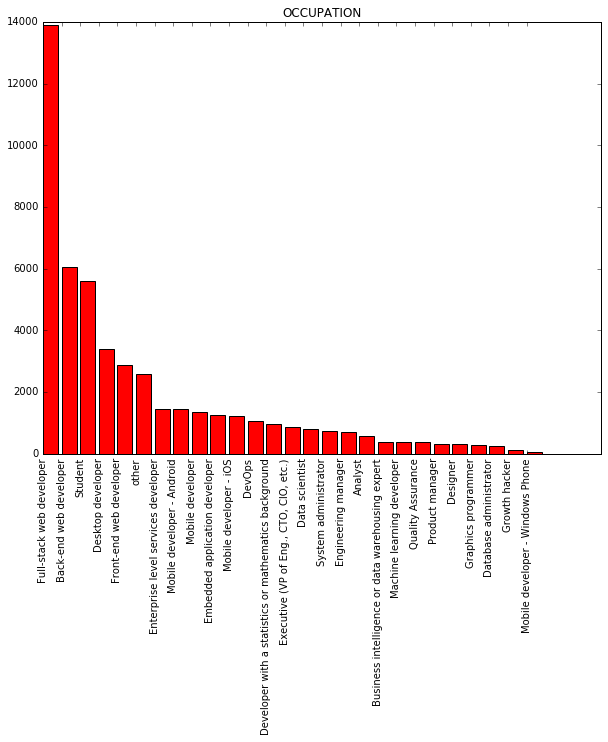

In [161]:
# we'll break down education and take a look at it here
def plot_axes(df, column_name):
    if df.__class__.__name__ == 'DataFrame':
        bernoulli_df_sum = convert_to_bernoulli_columns(df, column_name).sum()
    elif df.__class__.__name__ == 'Series':
        bernoulli_df_sum = df
        
    bernoulli_df_sum.sort_values(inplace=True, 
                                 ascending=False,
                                 na_position='first')
    x = bernoulli_df_sum.index
    y = bernoulli_df_sum
    
    return x, y, column_name

def plot_bernoulli_df((x, y, column_name)):
    ind = np.arange(len(y))

    pl.figure(figsize=(10,8))
    pl.title("{}".format(column_name.upper()))
    pl.bar(np.arange(len(x)),
           y.values,
           color='r',
           tick_label=list(x))
    pl.xticks(np.arange(len(x)), list(x), rotation='vertical')
    pl.subplots_adjust(bottom=0.15)
    pl.show()
    
edu_sum = convert_to_bernoulli_columns(df, 'education').sum()

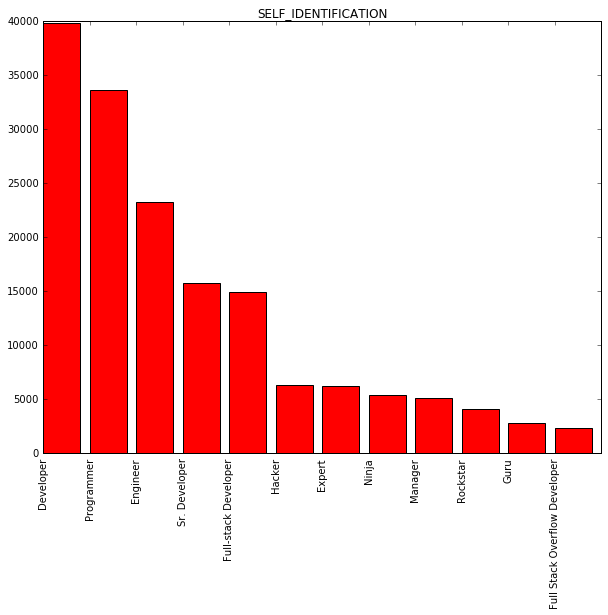

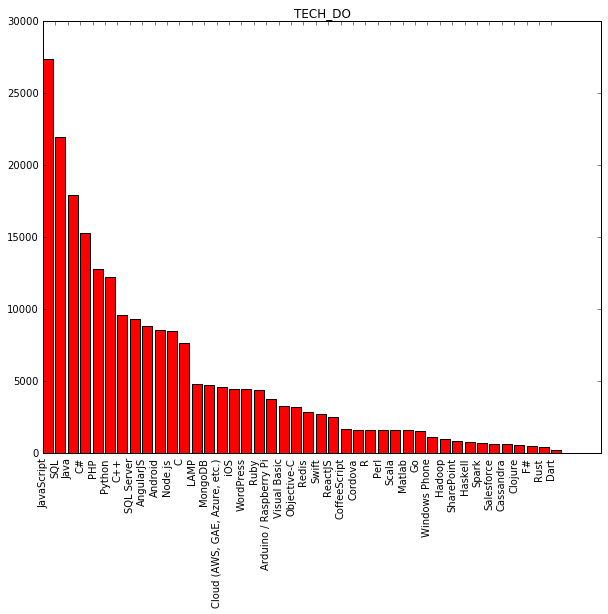

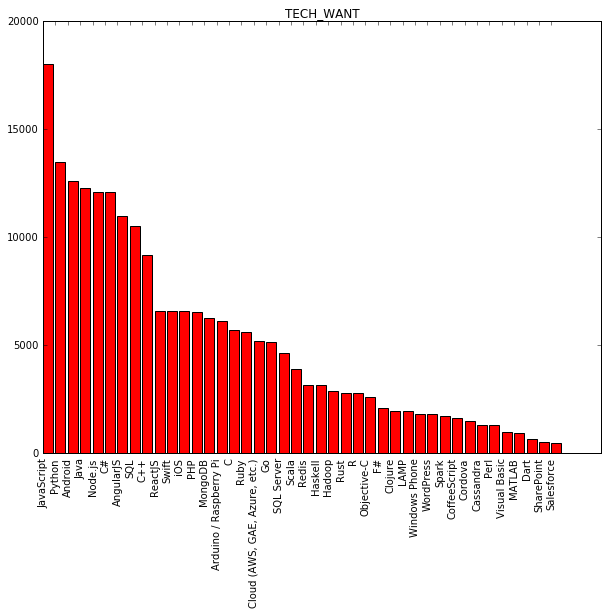

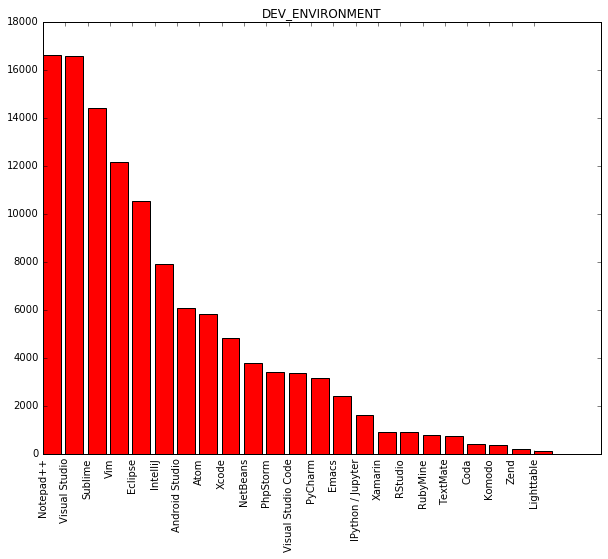

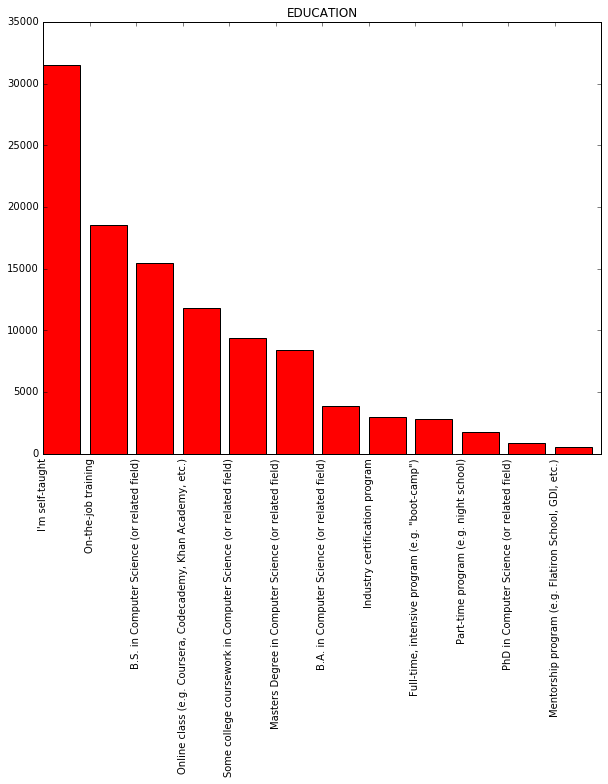

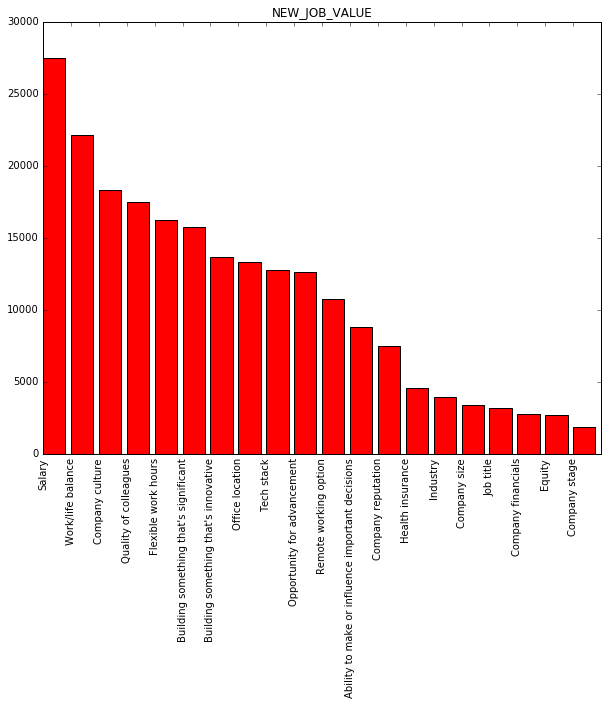

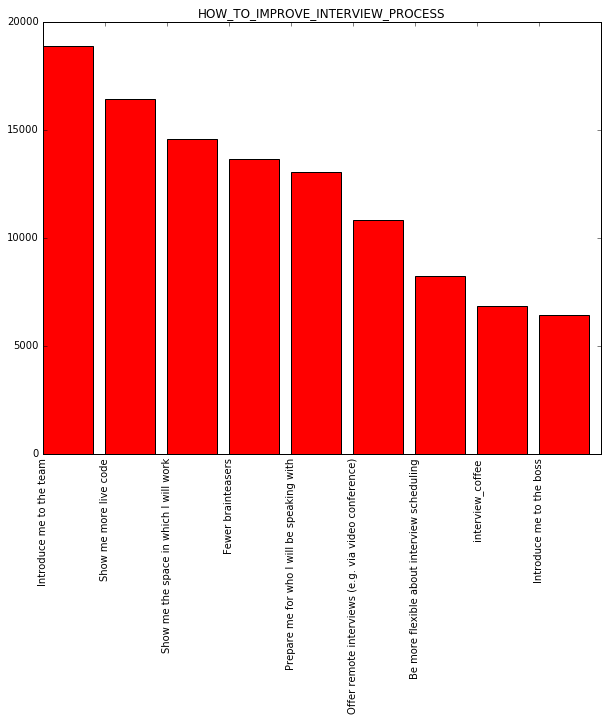

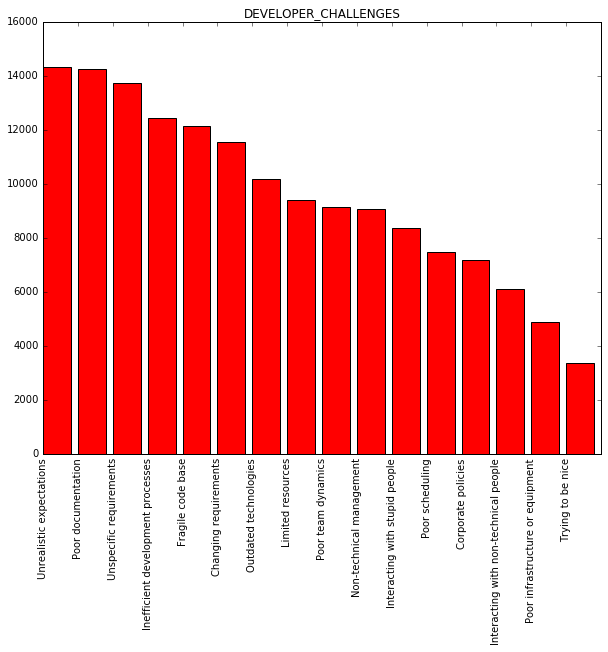

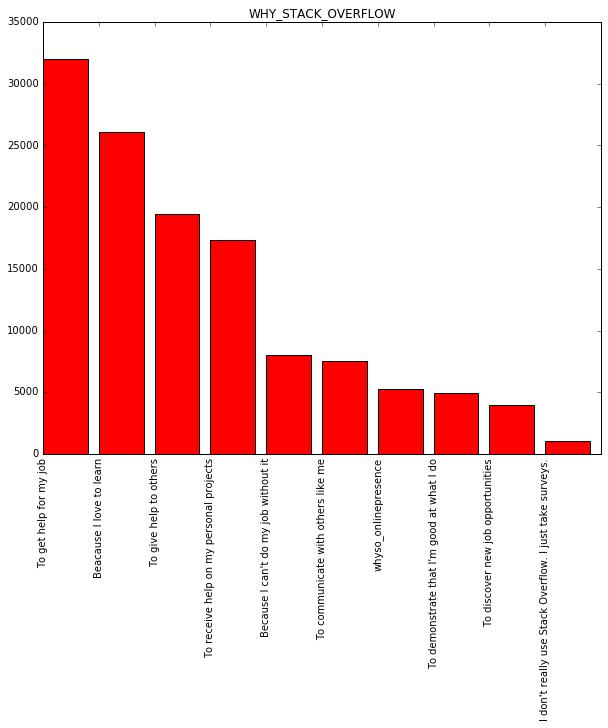

In [10]:
# plot bar graphs of each of the listed columns, using the functions above
for column in large_columns:
    plot_bernoulli_df((plot_axes(df,column)))

## Need to recombine the expanded columns into the original dataset

The original dataset should have (12 + 42 + 42 + 23 + 12 + 20 + 9 + 16 + 10 - 9) more columns.

In [11]:
edu_df = convert_to_bernoulli_columns(df, 'education')

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.mixture import GMM

pipe_lr = Pipeline([("scl", StandardScaler()),
                    ("pca", PCA()),
                    ("gmm", GMM())
                ])

pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, n_components=None, whiten=False)), ('gmm', GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=1, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0))])

In [26]:
# Reduce the data into the necessary amount of dimensions
# Scale the data to find a correlation among the variables
pipe_lr.score(X_test, y_test).shape

(6880,)

# The Target/Label column(s)

First, we have to categorize the target column(s):

Is it a single column or multiple columns?

Is it a classification or regression?


In [87]:
# for the target column we need to vectorize it
# the target column is also

sw_vs_st = df['star_wars_vs_star_trek']


def transform_labels(target_col):
    le = LabelEncoder()
    le.fit(target_col)
    return le.transform(target_col)


def transform_labels_except_nan(target_col):
    print target_col.shape
    mapper = {"Star Wars": 1,
              "Star Trek": 2,
              "Star Wars; Star Trek": 3}
    
    target_col = target_col.map(mapper)
    print target_col.shape
    return target_col

vectorized_target_col = transform_labels(sw_vs_st)

imr = Imputer(missing_values=0, strategy="median", axis=1)
vectorized_target_col = imr.fit_transform(vectorized_target_col)
vectorized_target_col = vectorized_target_col[0]
vectorized_target_col = pd.DataFrame(vectorized_target_col)

/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [88]:
# Merge feature and label columns
edu_sw_st = pd.concat([edu_df, vectorized_target_col], axis=1)
edu_sw_st = edu_sw_st.dropna()

## How do we deal with NaN entries and multiclass labels?

In [198]:
# Let's test an ML algorithm to predict the language a person is using, based on the dev environment
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# I'm using SVM because it is still effective with a high number of features, sometimes even when the number of features
# is greater than the number of samples
# Use Random Forests
# Use Gradient Boosting

# X = edu_sw_st[edu_sw_st.columns[:min(*edu_sw_st.shape) - 1]]
# y = edu_sw_st[edu_sw_st.columns[-1]]

def train_clf(clf, X_train, y_train):
    a = time.time()
    clf.fit(X_train, y_train)
    b = time.time()
    
    print "Training time for {}: {}".format(clf.__class__.__name__, b - a)


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# clf = SVC(kernel='poly',
#           degree=4,
#           gamma=0.3,
#           C=)

# train_clf(clf, X_train, y_train)

In [212]:
def prediction(clf, X_test, y_test):
    a = time.time()
    pred = clf.predict(X_test)
    b = time.time()
    print "Prediction time in seconds: {}".format(b - a)
    return f1_score(y_test, pred)

prediction(clf, X_test, y_test)

Prediction time in seconds: 0.360489845276


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


1.0

In [115]:
from sklearn.cross_validation import StratifiedKFold
skf = StratifiedKFold(y, n_folds=5)

In [135]:
train_indices, test_indices = next(iter(skf))

X_train, y_train = X.iloc[train_indices], y[train_indices]
X_test, y_test = X.iloc[test_indices], y[test_indices]

clf = SVC()

train_clf(clf, X_train, y_train)


Training time for SVC: 63.1962859631


In [137]:
prediction(clf, X_test, y_test)

Prediction time in seconds: 3.62956309319


/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)


0.6918835503435915

In [152]:
# Let's try KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

params = {'n_neighbors': range(5, 11),
          'weights': ['distance'],
          'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
          }
scorer = make_scorer(f1_score)
knc = KNeighborsClassifier()
gs = GridSearchCV(estimator=knc, 
                  param_grid=params,
                  scoring=scorer)
c = time.time()
gs.fit(X, y)
print "Grid Search time in seconds: {}".format(time.time() - c)

/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/Applications/Code/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:756: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of sco

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10], 'weights': ['distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
       pre_dispatch='2*n_jobs', refit=True, scoring=make_scorer(f1_score),
       verbose=0)

## The prediction resulted worse than expected.

First: I'll see if there's a more appropriate metric, other than f1_score

Second: I'll need to first check if the parameters need tuning


In [304]:
from sklearn.cross_validation import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

pipe_lr = Pipeline(['scl', StandardScaler(),
                   'clf', SVC()])
pipe_lr.fit(X_train, y_train)
pipe_lr.score(X_test, y_test)


# skf = KFold(max(*X.shape), n_folds=5, shuffle=True, random_state=12)
# for train, test in skf:
#     print train, test

TypeError: zip argument #2 must support iteration

In [106]:
# problem: Target column includes 4 answers: SW, ST, SW+ST, NaN
# prediction Needs to either be binary or multivariable


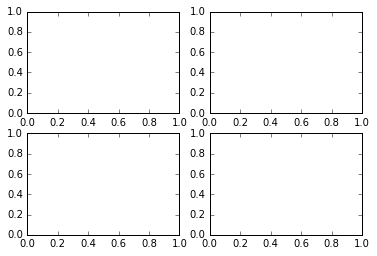

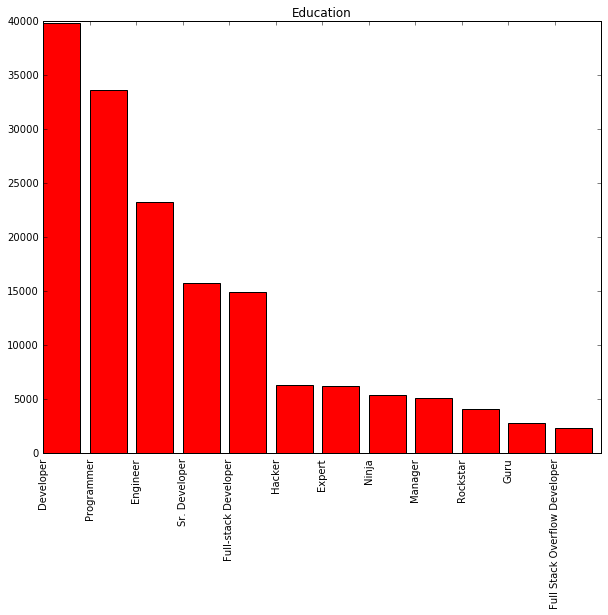

TypeError: 'NoneType' object is not iterable

In [11]:
# Create subplots here, so we can see all the columns data together

# adjusting subplots
gs = GridSpec(2,2,
              width_ratios=[1,1],
              height_ratios=[1,1])
ax1 = pl.subplot(gs[0])
ax2 = pl.subplot(gs[1])
ax3 = pl.subplot(gs[2])
ax4 = pl.subplot(gs[3])

axes = (ax1, ax2, ax3, ax4)
color = ('r', 'y', 'g', 'b')

def binary_counter(n):
    s = ""
    if n == 0: s = "00"
    while n > 0:
        s = str(1 & n) + s
        n /= 2
        
    if len(s) == 1:
        s = "0" + s
        
    return s
        

# filling in x and y data for each graph
for ax, column_name, c, n in zip(axes, large_columns[0:4], color, range(0, 4)):
    if len([int(x) for x in binary_counter(n).split()]) == 1:
        i = 0
    else:
        i, j = [int(x) for x in binary_counter(n).split()]
    x, y = plot_bernoulli_df((plot_axes(df, column_name)))
    x = range(0, len(x))
    ax.bar(x, y, color=c)
    ax[i, j].set_title('hello')
    ax.plot(x, y)

In [162]:
## target_col1 = df['open_to_new_job']
target_col2 = df['dev_environment']
target_col3 = df['employment_status']

all_answers_col1 = {}
for i in target_col1:
    if i not in all_answers_col1:
        all_answers_col1[i] = 1
    else:
        all_answers_col1[i] += 1
    
for answer, count in all_answers_col1.iteritems():
    print answer, count


nan 11650
I'm not actively looking, but I am open to new opportunities 27848
I am not interested in new job opportunities 9674
I am actively looking for a new job 6858


In [86]:
all_col2 = {}
for i, data in enumerate(target_col2):
    data = str(data).split('; ')
    
    for j in data:
        if j not in all_col2:
            all_col2[j] = 1
        else:
            all_col2[j] += 1
            
all_col2

{'Android Studio': 6073,
 'Atom': 5825,
 'Coda': 414,
 'Eclipse': 10564,
 'Emacs': 2433,
 'IPython / Jupyter': 1626,
 'IntelliJ': 7938,
 'Komodo': 379,
 'Lighttable': 143,
 'NetBeans': 3773,
 'Notepad++': 16607,
 'PhpStorm': 3437,
 'PyCharm': 3175,
 'RStudio': 917,
 'RubyMine': 805,
 'Sublime': 14434,
 'TextMate': 753,
 'Vim': 12180,
 'Visual Studio': 16580,
 'Visual Studio Code': 3371,
 'Xamarin': 934,
 'Xcode': 4822,
 'Zend': 224,
 'nan': 10317}